In [1]:
# load necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import json
import pickle
import glob

from readImages import *
from imageModifiers import *
from readDataFiles import *
from projEdgeBreaks import *
from gaussBreaks import *
from saveImages import *
from plottingFuncs import *

# change pandas parameter
pd.options.mode.chained_assignment = None
# change plot size
mpl.rcParams["figure.figsize"] = (10, 10)

## Specify file and folder locations

In [2]:
subjFile = "data/decoding-the-civil-war-subjects-9-29-17.csv"
clFile = 'data/letter-slope-classifications_10nov2017.csv'
savefile = "character_seg.pkl"

consensusFolder = "C:/Users/danny/Repos/text_segmentation/consensus/consensus/"
# consensusFile = consensusFolder + "decoding-the-civil-war-consensus-linewise_{mss_label}.csv"
consensusCsvFiles = glob.glob('{}/*.csv'.format(consensusFolder))
consensusCsvFiles = [i for i in consensusCsvFiles if "linewise" in i]

## Segmentation of words

In [3]:
def matchLines(lb, actuallb, yoffset, matchlim = 30):
    matches = []
    lb2 = np.add(lb, yoffset)
    for i in range(len(lb)):
        closest = np.argmin(np.abs(np.subtract(lb2[i], actuallb)))
        if np.abs(lb2[i] - actuallb[closest]) < matchlim:
            matches.append(closest)
        else:
            matches.append(-1)
    return matches

def wordBreaks(grey, lb, matches, linesForTele, nu=3.5, bi=2):
    accurL = []

    for i in range(1, len(lb)):
        print(i, end=" ")
        if matches[i] == -1:
            continue
        chunk = grey[lb[i-1]:lb[i],]
        rw = linesForTele.loc[matches[i],"consensus_text"]
        # remove leading and trailing "
        if rw[0] == '"':
            rw = rw[1:]
        if rw[-1] == '"':
            rw = rw[:-1]
        br = gaussBreaks(chunk, nu=nu, biThresh=bi, shear=0, fix=0)
        accurL.append({"lb_index":i, "consensus":rw, "breaks":br})
    return pd.DataFrame(accurL)

In [4]:
# run this to only do one file
consensusCsvFiles = [consensusCsvFiles[0]]

In [10]:
# subject file
subj = readSubjFile(subjFile)
# classification export
clExp = readSlopeClassification(clFile)


data = {}
# for consensusFile in consensusCsvFiles:
consensusFile = consensusCsvFiles[0]
#################################################################################
# Read data files
# consensus file (by line)
cons = readConsensusFile(consensusFile)
# combine data files
idAndUrl, telegrams = mergeSubjAndCons(subj, cons, clExp)

In [6]:
##############################################################################################
# collect the data for the wordbreaks

#     for im in list(idAndUrl.index):
im = list(idAndUrl.index)[0]
hdl_id = idAndUrl.loc[im, "hdl_id"]
data[hdl_id] = {}
print(hdl_id)

data[hdl_id]["url"] = idAndUrl.loc[im, "url_cons"]
linesForTele = telegrams.loc[telegrams["hdl_id"] == hdl_id]
linesForTele.loc[:,"y1"] = [np.mean(eval(l))
                            for l in linesForTele.loc[:,"y_loc"]]

# read in and do all pre-processing #################################
let_orig, grey_orig = readImg(idAndUrl.loc[im, "url_cons"])
grey, let, offset = removeEdges(grey_orig, let_orig, 35.0)
greySm = smoothImg(grey, 7.0)

# get linebreaks ####################################################
matchlim = 30
lb = projBreaks(greySm, "y")
lb = filterBreaks(lb, matchlim)
data[hdl_id]["lb"] = lb

# get matching lines with actual lines ##############################
actuallb = linesForTele.loc[:, 'y1']
data[hdl_id]['trim_offset'] = offset
matches = matchLines(lb, actuallb, offset[0])
data[hdl_id]["matches"] = matches

# get wordbreaks ####################################################
accur = wordBreaks(grey, lb, matches, linesForTele)
data[hdl_id]["word_segments"] = accur
print()

# get slope from classification export
slope = meanSlope(clExp, hdl_id)

mssEC_02_007
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 


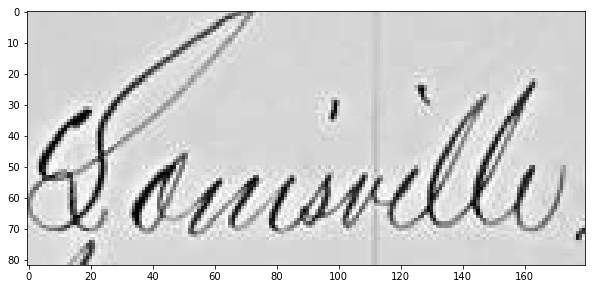

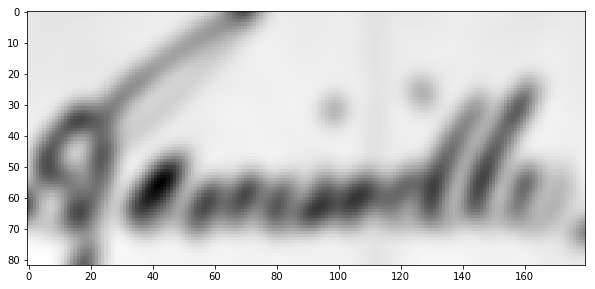

In [9]:
for i in range(1, len(lb)):
#     print(i, end=" ")
    if matches[i] == -1:
        continue
    rw = linesForTele.loc[matches[i],"consensus_text"]
    # remove leading and trailing "
    if rw[0] == '"':
        rw = rw[1:]
    if rw[-1] == '"':
        rw = rw[:-1]
    wb = accur.loc[accur['lb_index'] == i, 'breaks'].iloc[0]
    
    for j in range(1, len(wb)):
        chunk = grey[lb[i-1]:lb[i], wb[j-1]:wb[j]]
        plt.imshow(chunk, cmap='gray')
        plt.show()
        
        chunkSm = smoothImg(chunk, 4)
        plt.imshow(chunkSm, cmap='gray')
        plt.show()
        break
    break
        
    

In [ ]:
#         save object
# with open(savefile, "wb") as f:
#     pickle.dump(data, f)

mssEC_02_007
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 
mssEC_02_008
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 
mssEC_02_009
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 
mssEC_02_010
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 
mssEC_02_011
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 
mssEC_02_012
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
mssEC_02_013
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
mssEC_02_014
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 
mssEC_02_015
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
mssEC_02_016
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 

In [39]:
print(idAndUrl.loc[im, "url_cons"])

https://panoptes-uploads.zooniverse.org/production/subject_location/088bb5aa-7265-4246-a784-59d1ad1793ee.jpeg
